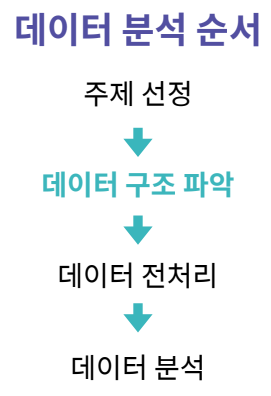

# 1. data

## 1 ) wordcup.csv

https://www.kaggle.com/abecklas/fifa-world-cup

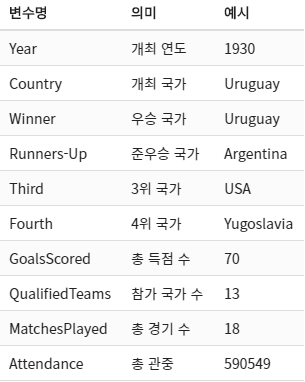

## 2 ) worldcup matches.csv
https://www.kaggle.com/abecklas/fifa-world-cup

# 2. 분석

In [1]:
import pandas as pd
import matplotpib.pyplot as plt


ModuleNotFoundError: No module named 'matplotpib'

## 1 ) 관중 수 출력

In [ ]:
world_cups = pd.read_csv("WorldCups.csv")
world_cups = world_cups[['Year', 'Attendance']]
print(world_cups)

plt.plot(world_cups['Year'], world_cups['Attendance'], marker='o', color='black')

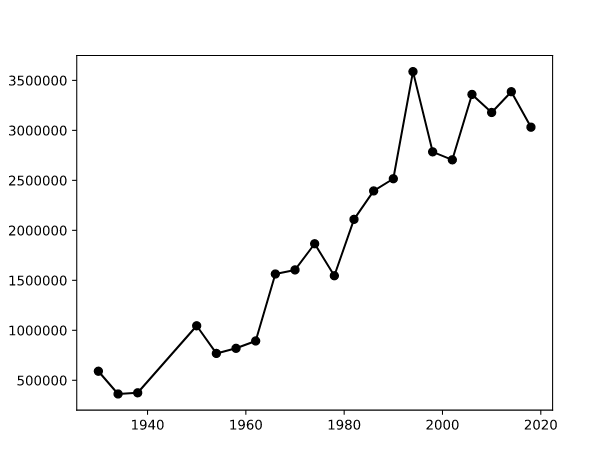

## 2 ) 경기 당 득점 수

In [ ]:
worldcup = pd.read_csv('WorldCups.csv')

worldcup = worldcup[['Year', 'GoalsScored', 'MatchesPlayed']]

worldcup['GoalsPerMatch'] = worldcup['GoalsScored'] / worldcup['MatchesPlayed']

print(worldcup)

In [ ]:
    Year  GoalsScored  MatchesPlayed  GoalsPerMatch
0   1930           70             18       3.888889
1   1934           70             17       4.117647
2   1938           84             18       4.666667
3   1950           88             22       4.000000
4   1954          140             26       5.384615
5   1958          126             35       3.600000
6   1962           89             32       2.781250
7   1966           89             32       2.781250
8   1970           95             32       2.968750
9   1974           97             38       2.552632
10  1978          102             38       2.684211
11  1982          146             52       2.807692
12  1986          132             52       2.538462
13  1990          115             52       2.211538
14  1994          141             52       2.711538
15  1998          171             64       2.671875
16  2002          161             64       2.515625
17  2006          147             64       2.296875
18  2010          145             64       2.265625
19  2014          171             64       2.671875
20  2018          169             64       2.640625

In [ ]:
world_cups = world_cups[['Year', 'GoalsScored', 'MatchesPlayed']]
world_cups["GoalsPerMatch"] = world_cups["GoalsScored"] / world_cups["MatchesPlayed"]


# 첫 번째 그래프 출력
fig, axes = plt.subplots(2, 1, figsize=(4,8))

axes[0].bar(x=world_cups['Year'], height=world_cups['GoalsScored'], color='grey', label='goals')

axes[0].plot(world_cups['Year'], world_cups['MatchesPlayed'], marker='o', color='blue', label='matches')

axes[0].legend(loc='upper left')


# 두 번째 그래프 출력
axes[1].grid(True)
axes[1].plot(world_cups['Year'], world_cups['GoalsPerMatch'], marker='o', color='red', label='goals_per_matches')

axes[1].legend(loc='lower left')

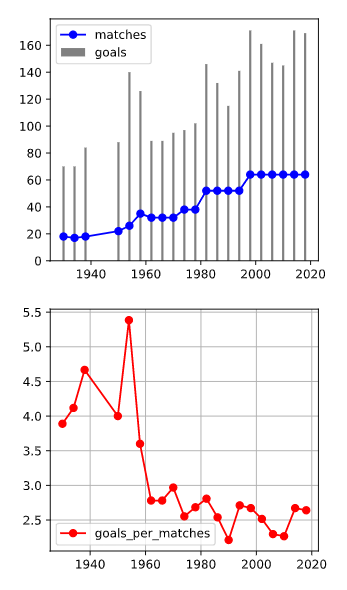

# 3. 전처리

In [ ]:
world_cups_matches = pd.read_csv('WorldCupMatches.csv')

# 값 변경
world_cups_matches = world_cups_matches.replace('Germany FR', 'Germany').replace('C�te d’Ivoire','Côte d’Ivoire').replace('rn">Bosnia and Herzegovina','Bosnia and Herzegovina').replace('rn">Serbia and Montenegro','Serbia and Montenegro').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">United Arab Emirates','United Arab Emirates').replace('Soviet Union','Russia')

# 중복 확인 및 제거
dupli = world_cups_matches.duplicated()
print(len(dupli[dupli==True]))

world_cups_matches = world_cups_matches.drop_duplicates()
dupli = world_cups_matches.duplicated()
print(len(dupli[dupli==True]))

# 4. 국가별 득점 수 구하기

In [ ]:
world_cups_matches = pd.read_csv('WorldCupMatches.csv')
world_cups_matches = preprocess.world_cups_matches


home = world_cups_matches.groupby(['Home Team Name'])['Home Team Goals'].sum()
away = world_cups_matches.groupby(['Away Team Name'])['Away Team Goals'].sum()


goal_per_country = pd.concat([home, away], axis=1, sort=True).fillna(0)


goal_per_country["Goals"] = goal_per_country["Home Team Goals"] + goal_per_country["Away Team Goals"]

goal_per_country = goal_per_country["Goals"].sort_values(ascending = False)

goal_per_country = goal_per_country.astype(int)


print(goal_per_country)

In [ ]:
Germany                   224
Brazil                    221
Argentina                 131
Italy                     128
France                    106
Spain                      92
Hungary                    87
Netherlands                86
Uruguay                    80
England                    79
Sweden                     74
Russia                     66
Yugoslavia                 60
Mexico                     57
Belgium                    52
Switzerland                45
Czechoslovakia             44
Poland                     44
Austria                    43
Portugal                   43
Chile                      40
USA                        37
Korea Republic             31
Romania                    30
Paraguay                   30
Denmark                    27
Colombia                   26
Scotland                   25
Bulgaria                   22
Croatia                    21
Nigeria                    20
Turkey                     20
Peru                       19
Cameroon                   18
Costa Rica                 17
Japan                      14
Ghana                      13
Algeria                    13
Northern Ireland           13
Côte d'Ivoire              13
Morocco                    12
Australia                  11
South Africa               11
Ecuador                    10
Republic of Ireland        10
Saudi Arabia                9
Tunisia                     8
Norway                      7
Senegal                     7
Korea DPR                   6
Greece                      5
Slovakia                    5
German DR                   5
Iran                        5
Ukraine                     5
Cuba                        5
Slovenia                    5
Bosnia and Herzegovina      4
New Zealand                 4
Wales                       4
Czech Republic              3
Jamaica                     3
Honduras                    3
Egypt                       3
Haiti                       2
IR Iran                     2
United Arab Emirates        2
Kuwait                      2
Serbia                      2
Serbia and Montenegro       2
Israel                      1
El Salvador                 1
Angola                      1
Iraq                        1
Bolivia                     1
Togo                        1
Trinidad and Tobago         0
Dutch East Indies           0
Canada                      0
China PR                    0
Zaire                       0

In [ ]:
goal_per_country = preprocess.goal_per_country
goal_per_country = goal_per_country[:10]

# x, y값 저장
x = goal_per_country.index
y = goal_per_country.values

#그래프 그리기
fig, ax = plt.subplots()

ax.bar(x, y, width = 0.5)

# x축 항목 이름 지정, 30도 회전
plt.xticks(x, rotation=30)
plt.tight_layout()

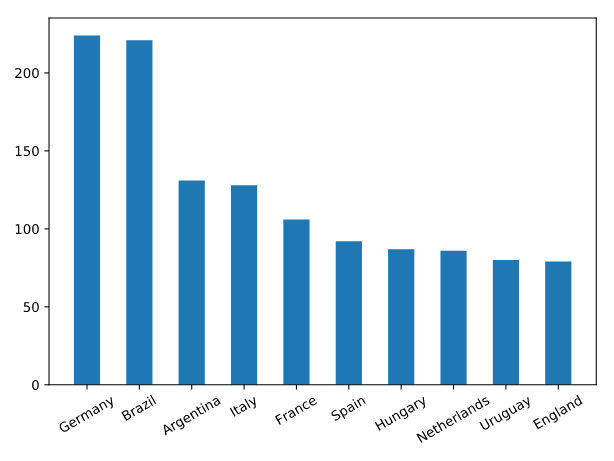

# 5. 월드컵 다득점 국가 순위

In [ ]:
world_cups_matches = preprocess.world_cups_matches

# 2014년도만 가져오기
world_cups_matches = world_cups_matches[world_cups_matches['Year']==2014]

# home / away team별로 그룹화
home_team_goal = world_cups_matches.groupby(['Home Team Name'])['Home Team Goals'].sum()
away_team_goal = world_cups_matches.groupby(['Away Team Name'])['Away Team Goals'].sum()

# home + away, 결측치는 0으로 채우기
team_goal_2014 = pd.concat([home_team_goal, away_team_goal], axis=1).fillna(0)

# golas columns 만들기
team_goal_2014['goals'] = team_goal_2014['Home Team Goals'] + team_goal_2014['Away Team Goals']
team_goal_2014 = team_goal_2014.drop(['Home Team Goals', 'Away Team Goals'], axis=1)
team_goal_2014.astype('int')

# 정렬
team_goal_2014 = team_goal_2014['goals'].sort_values(ascending=False)

print(team_goal_2014)

In [ ]:
Germany                   18
Netherlands               15
Colombia                  12
Brazil                    11
France                    10
Argentina                  8
Algeria                    7
Switzerland                7
Croatia                    6
Belgium                    6
Chile                      6
USA                        5
Costa Rica                 5
Mexico                     5
Uruguay                    4
Bosnia and Herzegovina     4
Spain                      4
Ghana                      4
Portugal                   4
Côte d'Ivoire              4
Australia                  3
Nigeria                    3
Greece                     3
Korea Republic             3
Ecuador                    3
England                    2
Russia                     2
Italy                      2
Japan                      2
Cameroon                   1
Honduras                   1
IR Iran                    1

In [ ]:
team_goal_2014.plot(x=team_goal_2014.index, y=team_goal_2014.values, kind="bar", figsize=(12, 12), fontsize=14)

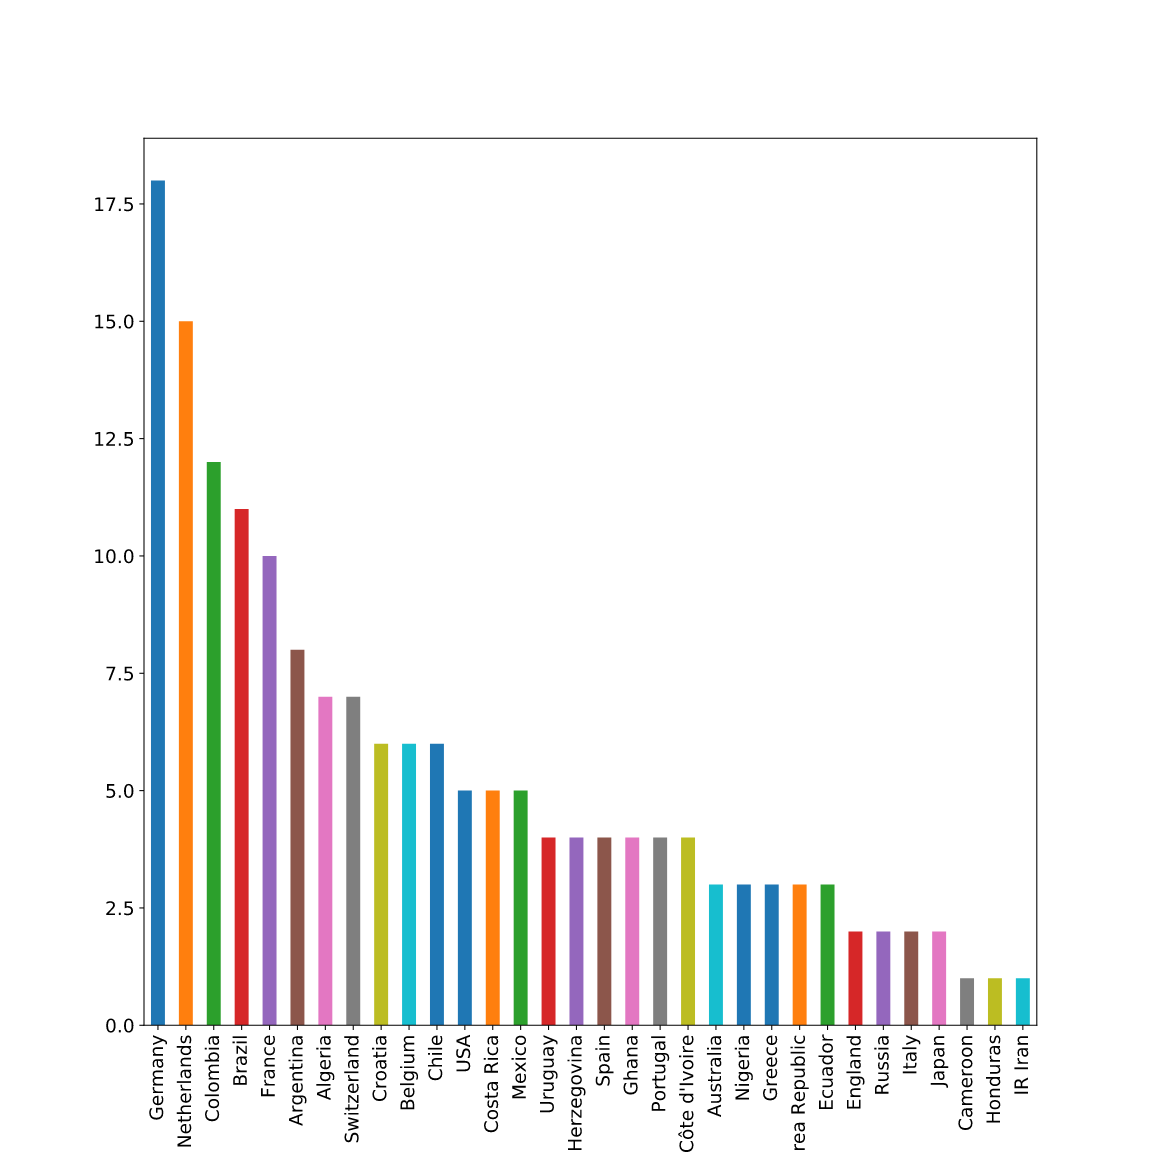

# 6. 월드컵 4강 이상 성적 집계하기

In [ ]:
world_cups = pd.read_csv("WorldCups.csv")

# 1 ~ 4위 국가
winner = world_cups["Winner"]
runners_up = world_cups["Runners-Up"]
third = world_cups["Third"]
fourth = world_cups["Fourth"]

# 국가별로 count해주기
winner_count = pd.Series(winner.value_counts())
runners_up_count = pd.Series(runners_up.value_counts())
third_count = pd.Series(third.value_counts())
fourth_count = pd.Series(fourth.value_counts())

# dataframe 생성
ranks = pd.DataFrame({
  "Winner" : winner_count,
  "Runners_Up" : runners_up_count,
  "Third" : third_count,
  "Fourth" : fourth_count
})

# 결측치는 0으로 채운다
ranks = ranks.fillna(0).astype('int64')

# 1,2,3,4등 순서대로 내림차순 정렬
ranks = ranks.sort_values(['Winner', 'Runners_Up', 'Third', 'Fourth'], ascending=False)

print(ranks)

In [ ]:
                Winner  Runners_Up  Third  Fourth
Brazil               5           2      2       2
Germany              4           4      4       1
Italy                4           2      1       1
Argentina            2           3      0       0
France               2           1      2       1
Uruguay              2           0      0       3
England              1           0      0       2
Spain                1           0      0       1
Netherlands          0           3      1       1
Czechoslovakia       0           2      0       0
Hungary              0           2      0       0
Sweden               0           1      2       1
Croatia              0           1      1       0
Poland               0           0      2       0
Austria              0           0      1       1
Belgium              0           0      1       1
Portugal             0           0      1       1
Chile                0           0      1       0
Turkey               0           0      1       0
USA                  0           0      1       0
Yugoslavia           0           0      0       2
Bulgaria             0           0      0       1
Korea Republic       0           0      0       1
Russia               0           0      0       1

In [ ]:
# x축에 그려질 막대그래프들의 위치입니다.
x = np.array(list(range(0, len(ranks))))

# 그래프를 그립니다.
fig, ax = plt.subplots()

# x 위치에, 항목 이름으로 ranks.index(국가명)을 붙입니다.
plt.xticks(x, ranks.index, rotation=90)
plt.tight_layout()

# 4개의 막대를 차례대로 그립니다.
ax.bar(x - 0.3, ranks['Winner'],     color = 'gold',   width = 0.2, label = 'Winner')
ax.bar(x - 0.1, ranks['Runners_Up'], color = 'silver', width = 0.2, label = 'Runners_Up')
ax.bar(x + 0.1, ranks['Third'],      color = 'brown',  width = 0.2, label = 'Third')
ax.bar(x + 0.3, ranks['Fourth'],     color = 'black',  width = 0.2, label = 'Fourth')

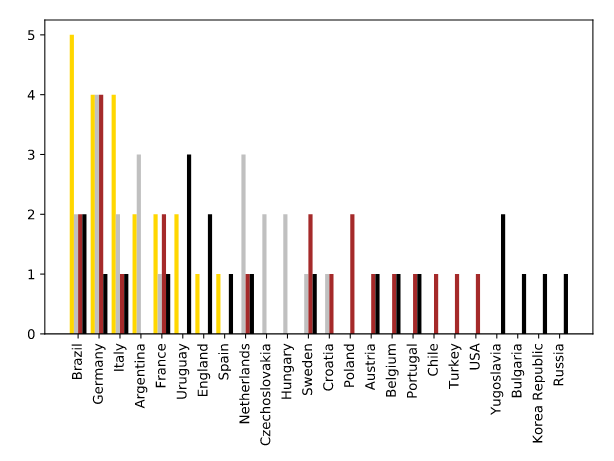